In [1]:
# getting the data
import requests
from pathlib import Path
link_train = 'https://raw.githubusercontent.com/Mudap10/linear_regression/main/boston_housing/train.csv'
link_test = 'https://raw.githubusercontent.com/Mudap10/linear_regression/main/boston_housing/test.csv'
request_train = requests.get(link_train)
request_test = requests.get(link_test)


with open('train.csv', 'wb')as f:
  f.write(request_train.content)

with open('test.csv', 'wb')as f:
  f.write(request_test.content)

In [2]:
# open the csv
import pandas as pd
test_data = pd.read_csv(Path('test.csv'))
train_data = pd.read_csv(Path('train.csv'))

In [3]:
test_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [4]:
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
# turn the data to tensor
import torch
train_data = torch.tensor(train_data.values, dtype=torch.float)
test_data = torch.tensor(test_data.values, dtype=torch.float)

In [6]:
# standardization the data
train_mean = torch.mean(train_data, dim=0)
train_std = torch.std(train_data, dim=0)

test_mean = torch.mean(test_data, dim=0)
test_std = torch.std(test_data, dim=0)


train_data_standardized = (train_data - train_mean) / train_std
test_data_standardized = (test_data - test_mean) / test_std

In [19]:
# test data
X_test = test_data_standardized[:, 1:14]

In [7]:
# getting feature and target for train
X_train, y_train = train_data_standardized[:, 1:14], train_data[:, 14]
X_train.shape, y_train.shape

(torch.Size([333, 13]), torch.Size([333]))

In [8]:
# check the data
X_train[0], y_train[0]

(tensor([-0.4562,  0.3224, -1.2837, -0.2524, -0.1665,  0.4395, -0.1076,  0.1918,
         -0.9876, -0.6631, -1.4630,  0.4323, -1.0662]),
 tensor(24.))

In [12]:
# model
from torch import nn
class modelR(nn.Module):
  def __init__(self, _input, _output, _hidden_layer):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(in_features=_input, out_features=_hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=_hidden_layer, out_features=_hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=_hidden_layer, out_features=_output)
    )

  def forward(self, x):
    return self.model(x)

model = modelR(X_train.shape[1], 1, 5)
model

modelR(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [13]:
# optimizer loss
loss_fn = nn.MSELoss()
optm = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [14]:
# train
epochs = 20000

train_losses = []


for epoch in range(epochs):
  model.train()
  logits = model(X_train).squeeze()
  loss = loss_fn(logits, y_train) ** 0.5
  train_losses.append(loss.item())

  optm.zero_grad()
  loss.backward()
  optm.step()

  if epoch % 1000 == 0:
    print(f'epoch: {epoch}| train loss: {loss:.5f}')

epoch: 0| train loss: 24.49194
epoch: 1000| train loss: 3.12561
epoch: 2000| train loss: 2.70127
epoch: 3000| train loss: 2.57251
epoch: 4000| train loss: 2.39702
epoch: 5000| train loss: 2.26743
epoch: 6000| train loss: 2.13717
epoch: 7000| train loss: 2.04717
epoch: 8000| train loss: 1.97524
epoch: 9000| train loss: 1.94788
epoch: 10000| train loss: 1.93151
epoch: 11000| train loss: 1.91347
epoch: 12000| train loss: 1.90036
epoch: 13000| train loss: 1.89457
epoch: 14000| train loss: 1.89978
epoch: 15000| train loss: 1.89631
epoch: 16000| train loss: 1.88661
epoch: 17000| train loss: 1.88343
epoch: 18000| train loss: 1.88026
epoch: 19000| train loss: 1.87628


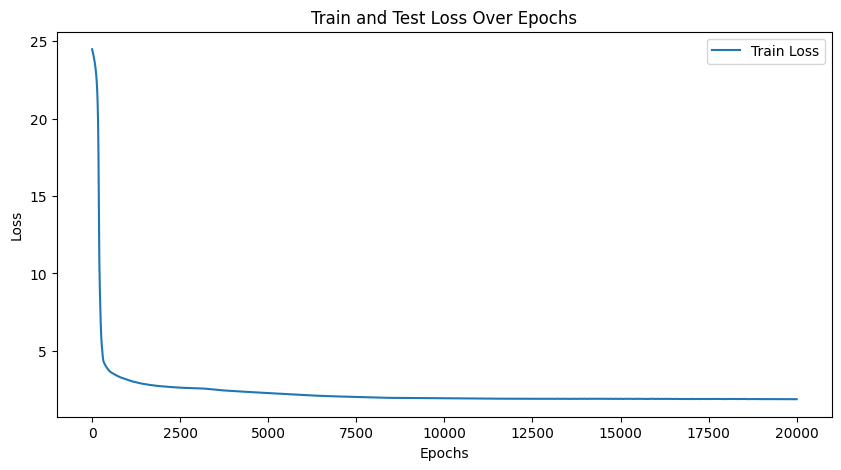

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss Over Epochs')
plt.show()

In [16]:
# RMSE with train
logits = model(X_train).squeeze()
loss = loss_fn(logits, y_train) ** 0.5
loss

tensor(1.8717, grad_fn=<PowBackward0>)

In [18]:
logits[:5], y_train[:5]

(tensor([23.7462, 22.7157, 33.5443, 33.9251, 21.3779], grad_fn=<SliceBackward0>),
 tensor([24.0000, 21.6000, 33.4000, 36.2000, 22.9000]))

In [22]:
# making prediction with test
test_logits = model(X_test).squeeze()

In [23]:
test_logits

tensor([32.0210, 24.0373, 18.8098, 16.3574, 18.6450, 16.8081, 16.8997, 15.7300,
        15.0529, 15.7462, 17.9992, 19.6471, 14.2519, 15.8812, 21.4464, 21.5156,
        22.0793, 34.1186, 15.7301, 27.5586, 21.3715, 22.5242, 21.0781, 22.5075,
        20.7402, 20.4829, 23.2395, 23.2745, 22.6171, 26.7111, 40.6448, 42.3226,
        34.4938, 18.7975, 17.4550, 21.0418, 18.8192, 18.1967, 18.7236, 18.6771,
        16.1626, 16.6731, 16.7410, 15.8698, 15.7358, 15.2496, 14.8904, 16.6282,
        18.5779, 19.7426, 21.3931, 39.3895, 42.0585, 25.0999, 19.2611, 26.7663,
        28.8575, 47.8516, 37.9761, 34.5696, 32.8739, 44.9704, 18.7912, 16.3199,
        18.8882, 21.2852, 22.8339, 25.6675, 19.6132, 22.0726, 26.9912, 46.8936,
        33.7826, 32.4175, 25.9005, 24.5393, 21.3806, 18.1218, 20.2661, 30.4388,
        21.1486, 19.9764, 38.9632, 59.1568, 39.6875, 34.5368, 48.2398, 21.8396,
        21.9143, 28.5889, 32.2091, 31.7789, 24.2911, 42.2409, 22.4165, 24.0018,
        33.0252, 22.1753, 27.0601, 25.76